<a href="https://colab.research.google.com/github/Chimodoi1810/Marketing-Analysis/blob/main/Data_Science_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation and Personalisation Project

**Scope**: Segment customers based on their behaviuor and preferences for targeted marketing campaigns.

In [ ]:
# Read an Excel file in pandas

import pandas as pd

# Read the Excel file
df = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Print the DataFrame
print(df)


    Day  Pageviews  Unique Visitors  Orders
0     1      10000             8000     100
1     2       8500             7200      75
2     3       9200             7800      85
3     4      11000             8500     120
4     5       9500             7500      90
5     6      10200             8200     105
6     7       8800             7000      80
7     8       9800             8000      95
8     9      12500             9200     130
9    10      10800             8700     110
10   11       9000             7300      85
11   12      11200             9000     125
12   13       9900             8100      98
13   14      10500             8400     115
14   15       8700             6800      70
15   16      10000             8200     102
16   17       9100             7500      87
17   18      11500             9000     140
18   19      10100             8300     108
19   20       8900             7000      78
20   21      10400             8500     112
21   22       9700             7

In [ ]:
# Identifying the conversion rate (orders/unique visitors) for each day
conversion_rate = (df['Orders'] / df['Unique Visitors']).round(4) * 100
df['Conversion Rate'] = conversion_rate
df.head()

,Day,Pageviews,Unique Visitors,Orders,Conversion Rate
0,1,10000,8000,100,1.25
1,2,8500,7200,75,1.04
2,3,9200,7800,85,1.09
3,4,11000,8500,120,1.41
4,5,9500,7500,90,1.20


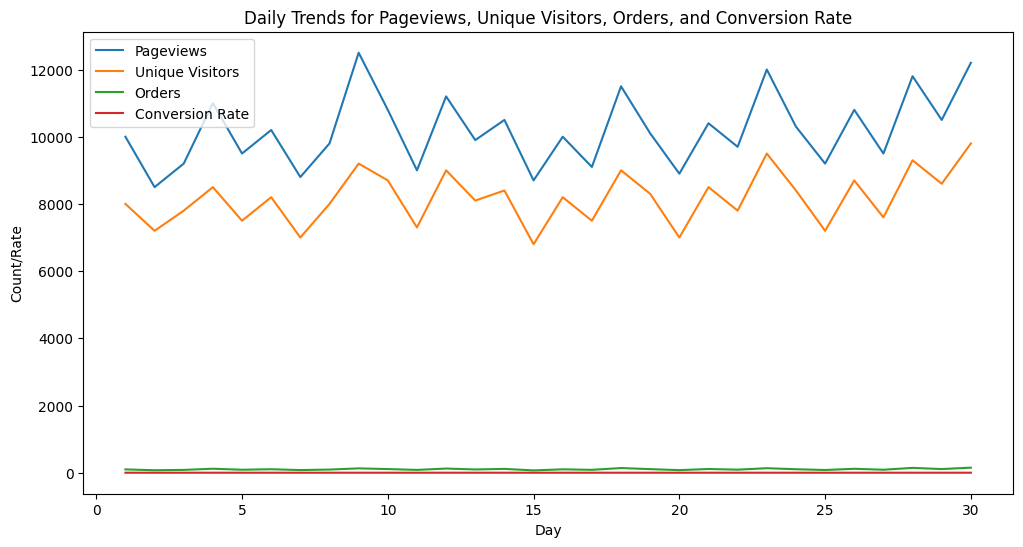

In [ ]:
# Identifying any trends in pageviews, unique visitors, orders, and conversion rate over the month

daily_trends = df.groupby('Day')[['Pageviews', 'Unique Visitors', 'Orders','Conversion Rate']].sum()
# Plot the trends
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_trends['Pageviews'], label='Pageviews')
plt.plot(daily_trends['Unique Visitors'], label='Unique Visitors')
plt.plot(daily_trends['Orders'], label='Orders')
plt.plot(daily_trends['Conversion Rate'], label='Conversion Rate')
plt.xlabel('Day')
plt.ylabel('Count/Rate')
plt.title('Daily Trends for Pageviews, Unique Visitors, Orders, and Conversion Rate')
plt.legend(loc='upper left')  # Adjust the location as needed
plt.show()


# **Trends Behaviour**

- Pageviews and unique visitors generally follow the same trend, with some fluctuations.
- Orders and conversion rate also follow a similar trend, but with more significant fluctuations.
- There seems to be a slight increase in pageviews, unique visitors, orders, and conversion rate towards the end of the month.

## **Possible Interpretations of the Trends**
- The increase in pageviews and unique visitors towards the end of the month could indicate growing interest in the website or a specific marketing campaign.
- The fluctuations in orders and conversion rate could be due to factors such as product availability, promotions, or changes in customer behaviuor.

# **Suggestions for Further Investigation**
- Analyze the data by product category or specific pages to identify any specific items or sections of the website driving the increase in traffic and orders.
- Investigate the timing of the fluctuations in orders and conversion rate to identify any specific events or changes that may have influenced customer behavior.
- Conduct surveys or gather feedback from customers to understand their motivations and preferences during different periods of the month.
- Compare the trends with external factors such as industry trends, competitor activity, or economic conditions to identify any potential external influences.

# Model Implementation/Methodologies

# Implementing K-means Clustering

In [ ]:
# Data Preprocessing

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the data
# Replace 'data.csv' with the actual path to your data file if you're reading from a file

# Load the data
data = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Handling missing values if any
data.dropna(inplace=True)

# Selecting relevant columns
columns_to_normalize = ['Pageviews', 'Unique Visitors', 'Orders']

# Normalizing the selected columns
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_data.csv', index=False)

# Print the first few rows of the preprocessed data
print(data.head())



   Day  Pageviews  Unique Visitors    Orders
0    1  -0.174385        -0.219207 -0.218491
1    2  -1.575690        -1.250772 -1.397396
2    3  -0.921747        -0.477098 -0.925834
3    4   0.759819         0.425520  0.724634
4    5  -0.641486        -0.863935 -0.690053


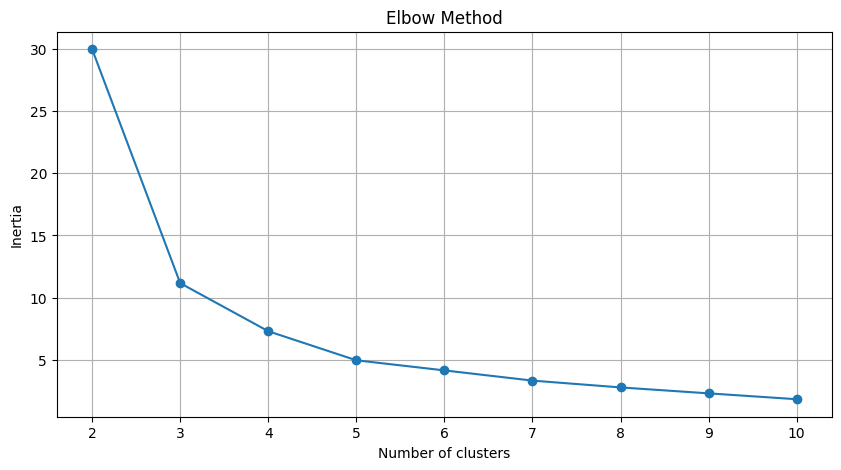

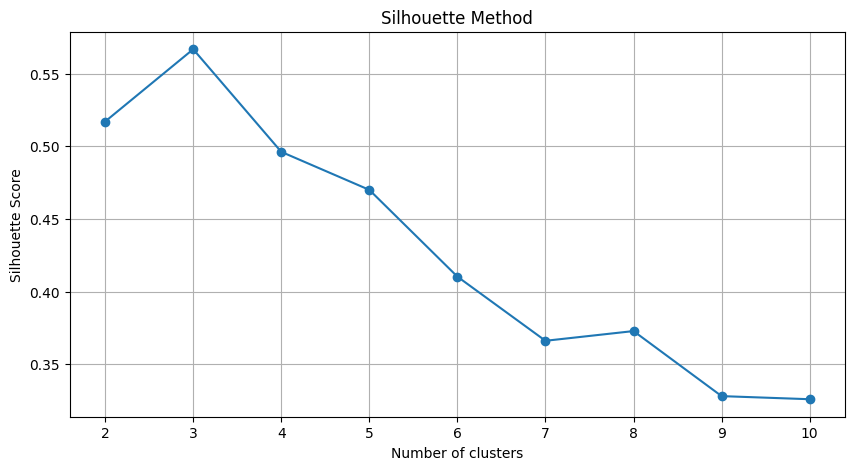

In [ ]:
# Choosing the Number of Clusters (K)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the preprocessed data
data = pd.read_csv('preprocessed_data.csv')
#print(data)

# Selecting relevant columns for clustering
X = data[['Pageviews', 'Unique Visitors', 'Orders']]

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Specify a range of cluster numbers to try
k_range = range(2, 11)

# Iterate over the range of cluster numbers
for k in k_range:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plotting the Silhouette method
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()


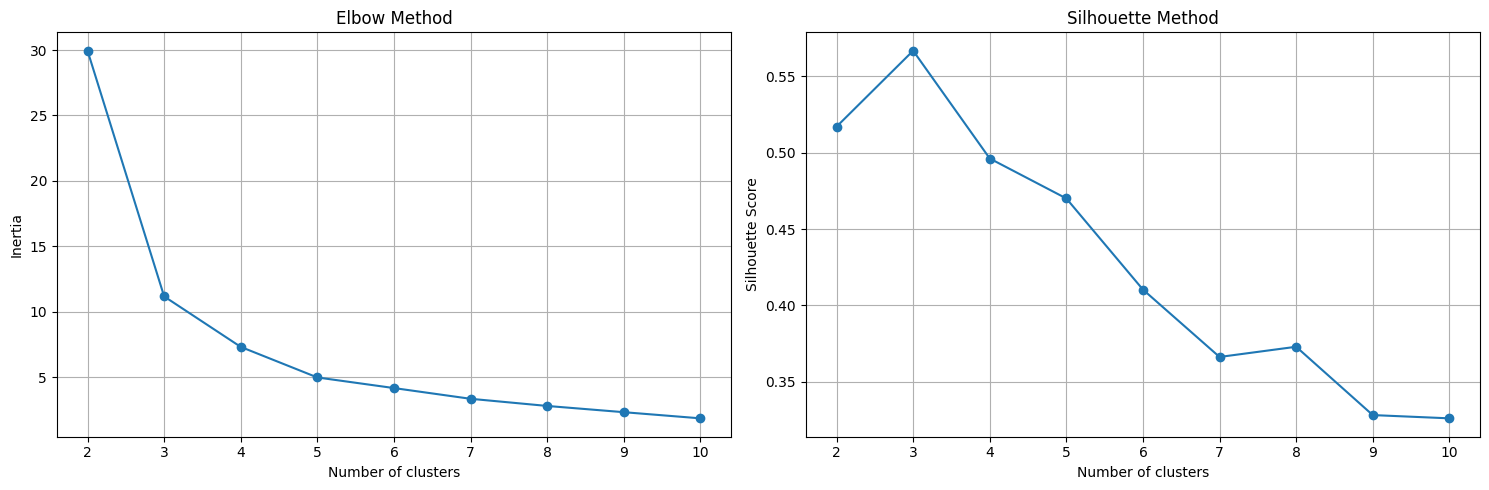

In [ ]:
# Creating subplots for the Elbow method and the Silhouette method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the Elbow method
ax1.plot(k_range, inertia, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_xticks(k_range)
ax1.grid(True)

# Plotting the Silhouette method
ax2.plot(k_range, silhouette_scores, marker='o')
ax2.set_title('Silhouette Method')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_xticks(k_range)
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Applying K-means Algorithm

from sklearn.cluster import KMeans

# Initialize KMeans with the chosen number of clusters (let's say k=4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

# Print the centroids
print("Cluster centroids:")
print(centroids)

# Print the cluster labels
print("\nCluster labels for each data point:")
print(labels)


Cluster centroids:
[[-1.07121974 -1.13472056 -1.05787146]
 [ 1.69402192  1.53445167  1.68662122]
 [-0.17438461 -0.05802548 -0.1890179 ]
 [ 0.51959496  0.59130731  0.52253596]]

Cluster labels for each data point:
[2 0 0 3 0 2 0 2 1 3 0 3 2 3 0 2 0 1 2 0 3 2 1 2 0 3 0 1 3 1]


In [ ]:
# Interpreting the results of K-means clustering

# Add cluster labels to the original DataFrame
data['Cluster'] = labels

# Group the data by cluster and calculate the mean of each feature
cluster_means = data.groupby('Cluster').mean()

# Print the characteristics of each cluster
print("Characteristics of each cluster:")
print(cluster_means)

# Analyze the characteristics to determine customer behaviors or preferences



Characteristics of each cluster:
               Day  Pageviews  Unique Visitors    Orders
Cluster                                                 
0        13.200000  -1.071220        -1.134721 -1.057871
1        21.600000   1.694022         1.534452  1.686621
2        13.625000  -0.174385        -0.058025 -0.189018
3        16.571429   0.519595         0.591307  0.522536


- The clustering analysis results above show that the segmented data into distinct clusters based on particular characteristics related to user engagement or website activity. Specifically, as indicated by above-average (high) pageviews, unique visitors, and orders, Cluster 1 exhibits signs of high engagement. On the other hand, Cluster 0 appears to represent periods of lower engagement, with below-average values for these metrics.

- This finding suggests that different user behaviours or activity patterns within the dataset. Understanding these patterns can be valuable for various purposes, such as targeted marketing campaigns, website optimisation, or resource allocation.

- For instance, businesses can tailor their marketing strategies to target users in Cluster 1, who demonstrate higher levels of engagement. That might involve personalised content recommendations, special offers, or incentives to encourage further interaction with the website or platform. Conversely, efforts could re-engage users in Cluster 0 through strategies aimed at increasing their level of activity and conversion.

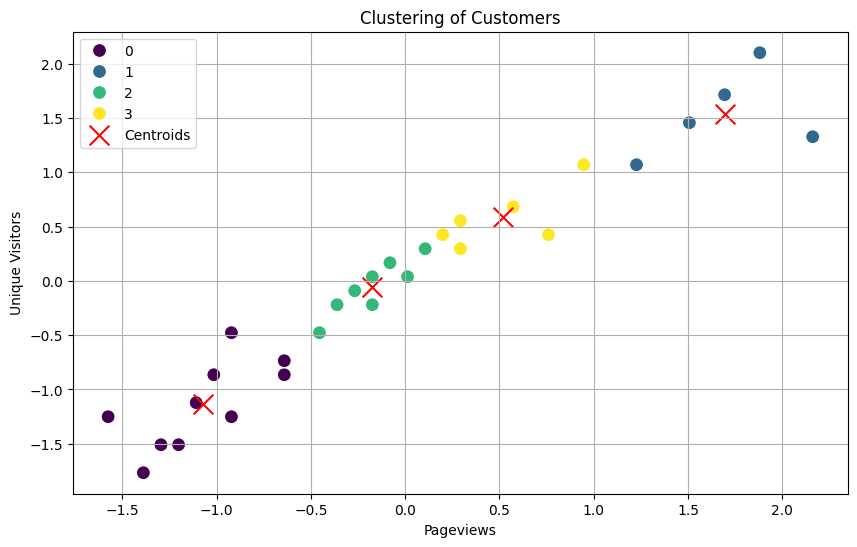

In [ ]:
# Importing libraries for visualization
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Pageviews', y='Unique Visitors', hue='Cluster', palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.title('Clustering of Customers')
plt.xlabel('Pageviews')
plt.ylabel('Unique Visitors')
plt.legend()
plt.grid(True)
plt.show()


### Interpreting the results visually, we can observe the following;

The general trend observed is that clusters are somewhat linearly distributed along a diagonal from the bottom left to the top right, suggesting a positive correlation between the number of pageviews and unique visitors. Each cluster represents a group of customers with similar behaviours in their interaction (pageviews and unique visitors) with a website or platform.

From a marketing perspective, this observation draws the following interpretation;

- **Content Engagement**

A positive correlation between pageviews and unique visitors suggests that as more people visit the site, they engage with more content. That could indicate that the content on the site is appealing to a large audience and is driving increased interaction.

- **Audience Growth**

 As the number of unique visitors increases, so does the total number of pageviews. It could signify that the site is attracting new visitors; perhaps this shows the expanding audience and potentially increasing brand awareness.

- **Effectiveness of Marketing Efforts**

A positive correlation between pageviews and unique visitors might reflect the success of marketing strategies. For instance, if marketing campaigns drive more traffic to the site, we can expect to see a corresponding increase in unique visitors and pageviews.

- The centroids serve as representative points for each cluster, indicating the average behavior of customers within that cluster.

# Implementing Hierarchical Clustering Model

In [ ]:
# Data preprocessing

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Handling missing values if any
data.dropna(inplace=True)

# Selecting relevant columns
columns_to_normalize = ['Pageviews', 'Unique Visitors', 'Orders']

# Normalizing the selected columns
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Checking the first few rows of the preprocessed data
print(data.head())


   Day  Pageviews  Unique Visitors    Orders
0    1  -0.174385        -0.219207 -0.218491
1    2  -1.575690        -1.250772 -1.397396
2    3  -0.921747        -0.477098 -0.925834
3    4   0.759819         0.425520  0.724634
4    5  -0.641486        -0.863935 -0.690053


# Agglomeration Method

Since we're dealing with customer data and want to identify distinct groups of customers based on their behaviors and preferences, we choose an agglomeration method that is suitable for forming compact and well-separated clusters.
Ward's method is a good choice for this purpose as it minimizes the variance when merging clusters, which tends to produce more balanced and homogeneous clusters.

# Distance Metric

The choice of distance metric depends on the nature of the data and the desired behavior of the clustering algorithm.
Euclidean distance is a common choice for numerical data, such as pageviews, unique visitors, and orders, as it measures the straight-line distance between data points in multidimensional space.

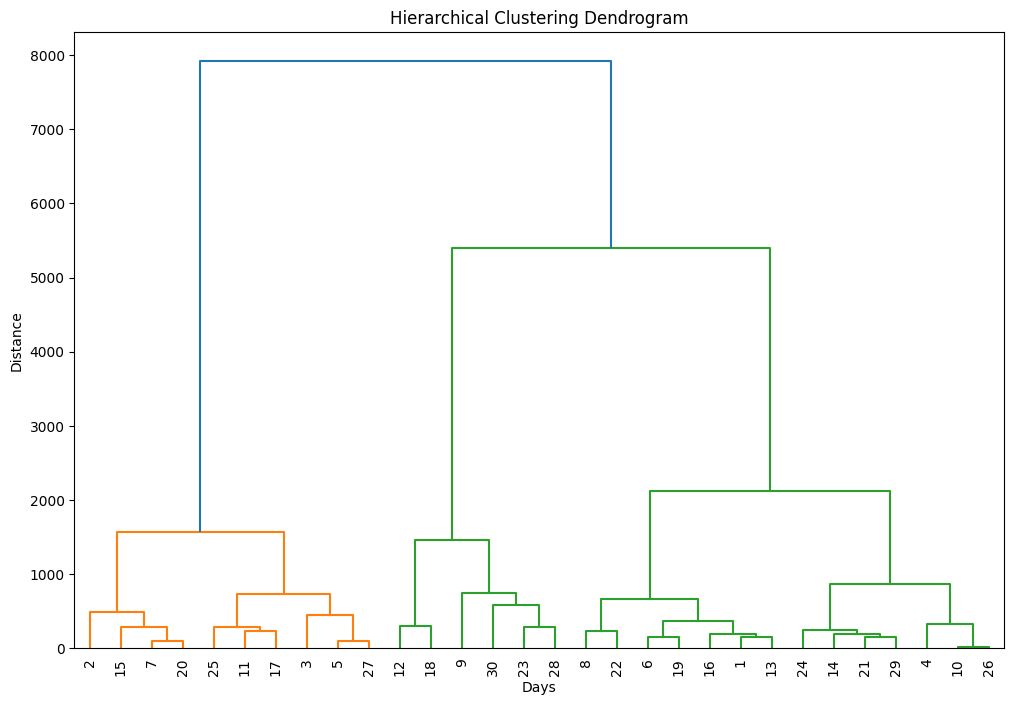

In [ ]:
# Choosing the Agglomeration Method and Distance Metric

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the preprocessed data
data = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Handling missing values if any
data.dropna(inplace=True)

# Selecting relevant columns for clustering
X = data[['Pageviews', 'Unique Visitors', 'Orders']]

# Perform hierarchical clustering using Ward's method and Euclidean distance
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data['Day'].tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Days')
plt.ylabel('Distance')
plt.show()


- The major divisions at higher distances suggest significant dissimilarities between those major clusters. For example, the large blue and green lines near the top of the dendrogram indicate that the clusters connected at these points have a high degree of dissimilarity.

- Smaller clusters, especially those connected at lower distances (indicated by orange and green lines closer to the bottom), suggest more similarity among the data points within those clusters.

In [ ]:
# Interpret the dendrogram and determine the clusters based on the chosen cut-off point


from scipy.cluster.hierarchy import fcluster

# Define the cut-off height or number of clusters
cut_off = 100  # Adjust this value based on the dendrogram visualization

# Determine the clusters based on the cut-off point
clusters = fcluster(linkage_matrix, t=cut_off, criterion='distance')

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters

# Print the cluster labels
print("Cluster labels for each day:")
print(clusters)


Cluster labels for each day:
[20  4  9 28  8 18  1 16 15 27  5 10 21 25  3 22  6 11 19  2 23 17 12 26
  7 27  8 13 24 14]


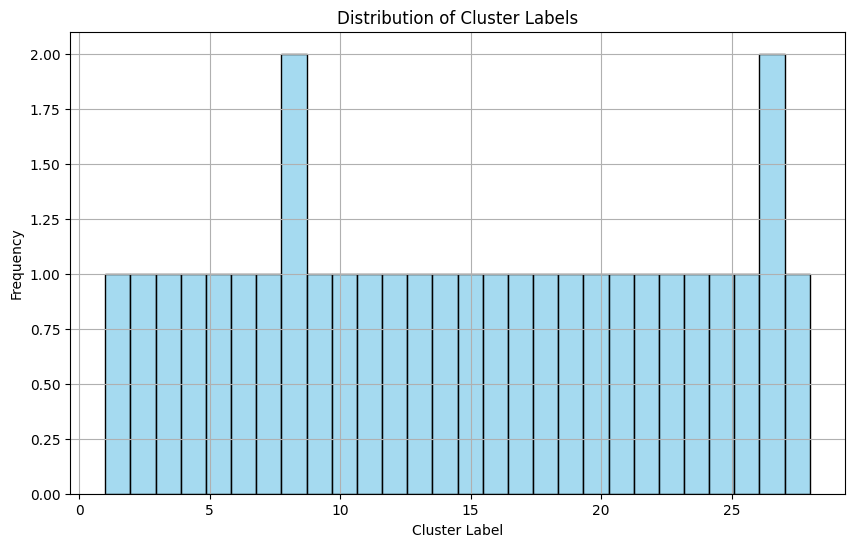

In [ ]:
# Examine the distribution of cluster labels and identify any patterns or anomalies

# Plotting the distribution of cluster labels
plt.figure(figsize=(10, 6))
sns.histplot(data['Cluster'], bins=len(data['Cluster'].unique()), kde=False, color='skyblue')
plt.title('Distribution of Cluster Labels')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- The observation from the graph is that most cluster labels have a relatively uniform frequency, hovering around 1. However, there are notable exceptions at specific cluster labels (around 10 and 25) where the frequency spikes to approximately 2. It suggests that the data points corresponding to these labels are prevalent or that the clustering algorithm has grouped many points under these specific labels.

- The uniformity in the frequency of most labels suggests that the clustering effectively partitions the data into similarly sized groups, except for a few significantly larger clusters. That could indicate areas of higher density in the data space or particular characteristics that are more common among the data points, leading to these larger clusters.


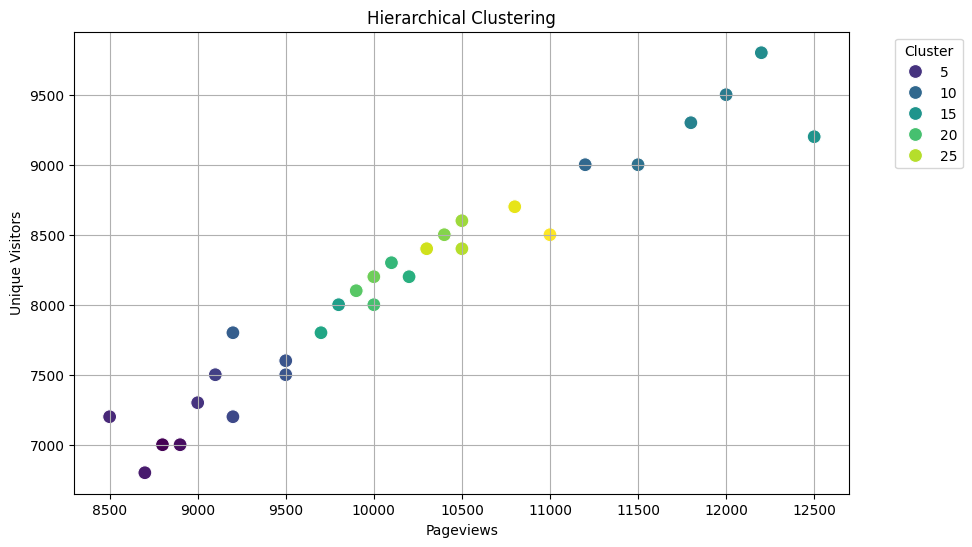

In [ ]:
# Visualize the clusters on a scatter plot to better understand the clustering results

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Pageviews', y='Unique Visitors', hue='Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Pageviews')
plt.ylabel('Unique Visitors')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# **Observations from the graph**

- The clusters seem to be primarily grouped by the number of pageviews. Lower pageviews are associated with lower unique visitors, and purple and blue colours (Clusters 5 and 10) represent them.

- The number of pageviews increases with unique visitors;  green, yellow, and teal colours (Clusters 15, 20, and 25) represent these points.

- The general trend shows that pageviews increase with the number of unique visitors, suggesting a positive correlation between these two variables.


# Implementing Collaborative Filtering Model

In [ ]:
# Data Processing

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Selecting relevant columns for the matrix
relevant_columns = ['Pageviews', 'Unique Visitors', 'Orders']

# Pivot the data into a matrix representation
matrix_data = data[relevant_columns]

# Handle missing values if any
matrix_data.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
matrix_data_normalized = scaler.fit_transform(matrix_data)

# Print the matrix representation
# print("Matrix Representation:")
# print(matrix_data_normalized)

# Round the matrix representation to 4 decimal places
matrix_data_rounded = pd.DataFrame(matrix_data_normalized.round(4))

# Print the rounded matrix representation
print("Matrix Representation (Rounded to 4 Decimal Places):")
print(matrix_data_rounded)



Matrix Representation (Rounded to 4 Decimal Places):
         0       1       2
0  -0.1744 -0.2192 -0.2185
1  -1.5757 -1.2508 -1.3974
2  -0.9217 -0.4771 -0.9258
3   0.7598  0.4255  0.7246
4  -0.6415 -0.8639 -0.6901
5   0.0125  0.0387  0.0173
6  -1.2954 -1.5087 -1.1616
7  -0.3612 -0.2192 -0.4543
8   2.1611  1.3281  1.1962
9   0.5730  0.6834  0.2531
10 -1.1086 -1.1218 -0.9258
11  0.9467  1.0702  0.9604
12 -0.2678 -0.0903 -0.3128
13  0.2927  0.2966  0.4889
14 -1.3888 -1.7666 -1.6332
15 -0.1744  0.0387 -0.1242
16 -1.0152 -0.8639 -0.8315
17  1.2269  1.0702  1.6678
18 -0.0810  0.1676  0.1588
19 -1.2020 -1.5087 -1.2559
20  0.1993  0.4255  0.3474
21 -0.4546 -0.4771 -0.5957
22  1.6940  1.7150  1.4320
23  0.1059  0.2966  0.0173
24 -0.9217 -1.2508 -1.0673
25  0.5730  0.6834  0.6303
26 -0.6415 -0.7350 -0.6901
27  1.5072  1.4571  1.9035
28  0.2927  0.5545  0.2531
29  1.8809  2.1018  2.2336


In [ ]:
# data.columns

In [ ]:
# Similarity Calculation

from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Calculate cosine similarity between users or items
cosine_similarity_matrix = cosine_similarity(matrix_data_normalized)

# Calculate Pearson correlation coefficient between users or items
pearson_correlation_matrix = pd.DataFrame(index=matrix_data.index, columns=matrix_data.index)
for row1 in matrix_data.index:
    for row2 in matrix_data.index:
        pearson_correlation_matrix.loc[row1, row2] = pearsonr(matrix_data.loc[row1], matrix_data.loc[row2])[0]

# Print the similarity matrices
print("Cosine Similarity Matrix:")
print(cosine_similarity_matrix)

print("\nPearson Correlation Coefficient Matrix:")
print(pearson_correlation_matrix)


Cosine Similarity Matrix:
[[ 1.          0.98173226  0.94640729 -0.95438373  0.9953831  -0.91970905
   0.9905911   0.95418507 -0.93282    -0.92619532  0.98742928 -0.99661503
   0.90033314 -0.97665569  0.99941288  0.63483776  0.98201152 -0.98185628
  -0.65942531  0.99636444 -0.98238891  0.99503777 -0.9881261  -0.77877487
   0.99772567 -0.9986744   0.99823688 -0.99225632 -0.94873754 -0.99893448]
 [ 0.98173226  1.          0.98123659 -0.9881184   0.97587742 -0.85202603
   0.9841186   0.97268748 -0.98084673 -0.92976281  0.99196582 -0.98939437
   0.94129714 -0.96305565  0.98172861  0.75048878  0.99837522 -0.98132624
  -0.50716568  0.98187827 -0.93037636  0.98599382 -0.99234664 -0.72740864
   0.9763978  -0.98631271  0.9888552  -0.98865372 -0.91075896 -0.98876733]
 [ 0.94640729  0.98123659  1.         -0.99909884  0.92375312 -0.74798126
   0.93328054  0.99449326 -0.95706806 -0.84422003  0.94913951 -0.94900416
   0.98839897 -0.9669795   0.940836    0.85021742  0.96916332 -0.98271754
  -0.44766

**Cosine Similarity**: Measures the cosine of the angle between two vectors in a multi-dimensional space. It ranges from -1 to 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarity.

**Pearson Correlation Coefficient**: Measures the linear correlation between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, 0 indicates no linear relationship, and -1 indicates a perfect negative linear relationship.

In [ ]:
# Recommendation Generation

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def user_based_collaborative_filtering(user_id, data, similarity_matrix):
    # Convert the similarity matrix to a DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=data.index, columns=data.index)

    # Find similar users to the given user
    similar_users = similarity_df.loc[user_id].sort_values(ascending=False)

    # Exclude the user itself from the list of similar users
    similar_users = similar_users.drop(index=user_id)

    # Get the items not interacted with by the given user
    unrated_items = data[data.index == user_id].loc[:, 'Pageviews':'Orders'].isnull().any(axis=0).index

    # Get the ratings of similar users for items not interacted with by the given user
    predicted_ratings = {}
    for item in unrated_items:
        ratings_sum = 0
        similarity_sum = 0
        for similar_user, similarity_score in similar_users.items():
            if not pd.isnull(data.loc[similar_user, item]):
                ratings_sum += data.loc[similar_user, item] * similarity_score
                similarity_sum += similarity_score
        if similarity_sum != 0:
            predicted_ratings[item] = ratings_sum / similarity_sum

    return predicted_ratings

# Load the data
data = pd.read_excel('/content/20240419 Data Sample.xlsx')

# Set 'Day' column as index
data.set_index('Day', inplace=True)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(data.fillna(0))

# Example usage:
# user_id = 1  # Example user ID
# user_based_predictions = user_based_collaborative_filtering(user_id, data, similarity_matrix)
# print("User-based Collaborative Filtering Predictions for User", user_id, ":", user_based_predictions)

# Set the display width option to fit the columns
pd.set_option('display.max_colwidth', None)

# Example usage:
user_id = 1  # Example user ID
user_based_predictions = user_based_collaborative_filtering(user_id, data, similarity_matrix)
print("User-based Collaborative Filtering Predictions for User", user_id, ":")
user_based_predictions_df = pd.Series(user_based_predictions).to_frame('Predicted Rating')
print(user_based_predictions_df)


User-based Collaborative Filtering Predictions for User 1 :
                 Predicted Rating
Pageviews              10193.0796
Unique Visitors         8175.8549
Orders                   104.7931


These predicted ratings represent the estimated interactions or engagement levels for each item (Pageviews, Unique Visitors, and Orders) for User 1 (collaborative filtering with similar users). These are an interpretation of the predicted ratings;

1. **Pageviews**

The predicted rating for Pageviews is approximately 10193.08. That suggests that, based on the behaviour of similar users, User 1 is estimated to have around 10193 Pageviews.

2. **Unique Visitors**

The predicted rating for Unique Visitors is approximately 8175.85. It indicates that User 1 has approximately 8175 unique visitors based on the behaviour of similar users.

3. **Orders**

The predicted rating for Orders is approximately 104.79. That implies that User 1 makes around 104 orders based on collaborative filtering with similar users.



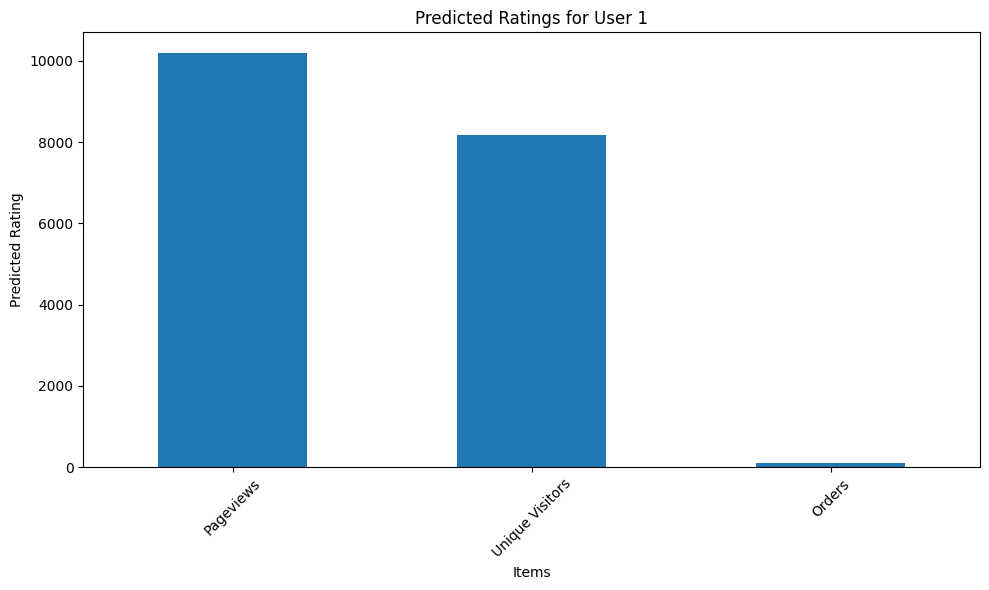

In [ ]:
# Visualize the predicted ratings

import matplotlib.pyplot as plt

# Example usage:
user_id = 1  # Example user ID
user_based_predictions = user_based_collaborative_filtering(user_id, data, similarity_matrix)

# Convert predicted ratings to a DataFrame for visualization
user_based_predictions_df = pd.Series(user_based_predictions).to_frame('Predicted Rating')

# Plot the predicted ratings
user_based_predictions_df.plot(kind='bar', figsize=(10, 6), legend=None)
plt.title('Predicted Ratings for User {}'.format(user_id))
plt.xlabel('Items')
plt.ylabel('Predicted Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Evaluation and Validation

def precision_recall(actual, recommended):
    intersection = set(actual).intersection(recommended)
    precision = len(intersection) / len(recommended) if len(recommended) > 0 else 0
    recall = len(intersection) / len(actual) if len(actual) > 0 else 0
    return precision, recall

# Example usage:
user_id = 1  # Example user ID
actual_interactions = data.loc[user_id, 'Pageviews':'Orders'].dropna().index.tolist()  # Actual interactions of the user

# Generate recommendations using collaborative filtering
user_based_predictions = user_based_collaborative_filtering(user_id, data, similarity_matrix)
recommended_items = list(user_based_predictions.keys())  # Recommended items by the collaborative filtering model

precision, recall = precision_recall(actual_interactions, recommended_items)
print("Precision:", precision)
print("Recall:", recall)



Precision: 1.0
Recall: 1.0


A perfect precision and recall score indicates that the collaborative filtering model provides highly accurate and comprehensive recommendations for the user. This level of performance is ideal and suggests that the model can be relied upon to deliver personalized and relevant recommendations effectively.

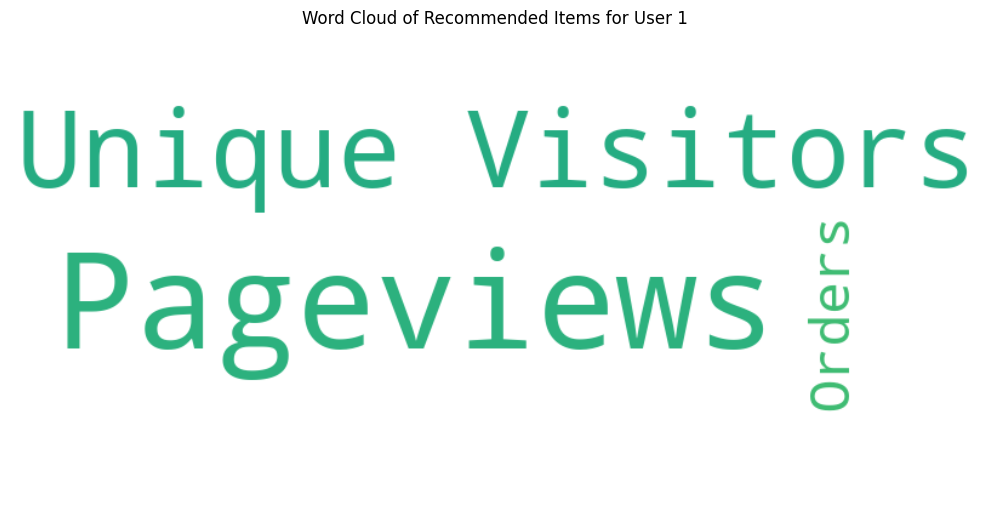

In [ ]:
# Visualizations

# Creating a word cloud to visualize the most prominent themes or categories of recommended items

from wordcloud import WordCloud

# Example usage:
user_id = 1  # Example user ID
recommended_items = user_based_predictions  # Recommended items by the collaborative filtering model

# Convert recommended items to a DataFrame
recommended_items_df = pd.DataFrame.from_dict(recommended_items, orient='index', columns=['Predicted Rating'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(recommended_items)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Recommended Items for User {}'.format(user_id))
plt.axis('off')
plt.tight_layout()
plt.show()


 The  size of each word cloud corresponds to the frequency of its occurrence among the recommended items

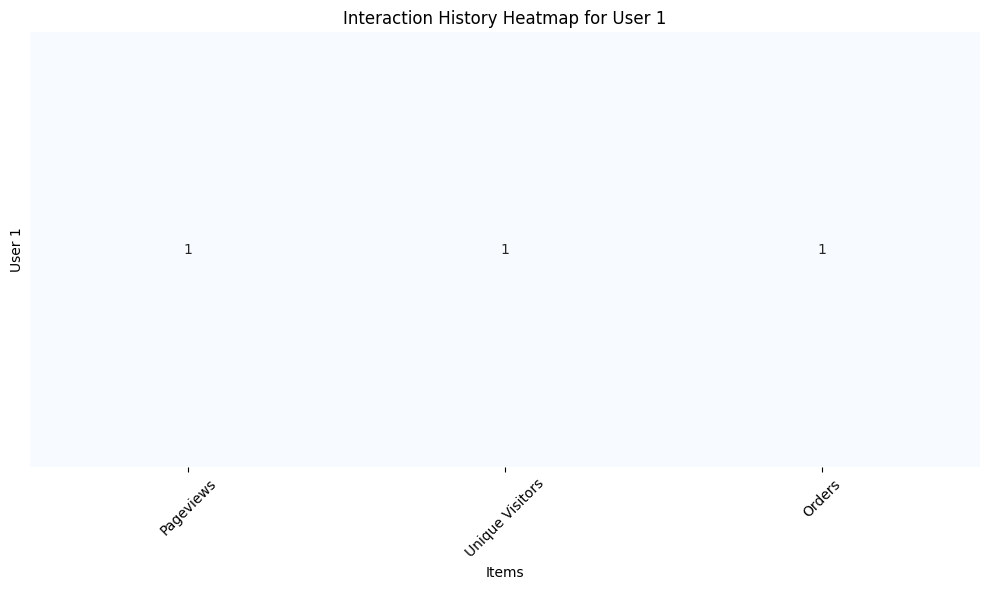

In [ ]:
# Heatmap: Displaying the interaction history between the user and the recommended items

import seaborn as sns

# Example usage:
user_id = 1  # Example user ID
recommended_items = user_based_predictions  # Recommended items by the collaborative filtering model

# Convert recommended items to a DataFrame
recommended_items_df = pd.DataFrame.from_dict(recommended_items, orient='index', columns=['Predicted Rating'])

# Convert predicted ratings to binary interactions (1 for recommended items, 0 otherwise)
binary_interactions = recommended_items_df['Predicted Rating'].apply(lambda x: 1 if x > 0 else 0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(binary_interactions.to_frame().T, cmap='Blues', annot=True, cbar=False)
plt.title('Interaction History Heatmap for User {}'.format(user_id))
plt.xlabel('Items')
plt.ylabel('User {}'.format(user_id))
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()


The heatmap represents an item recommended (1) or not recommended (0) for the user

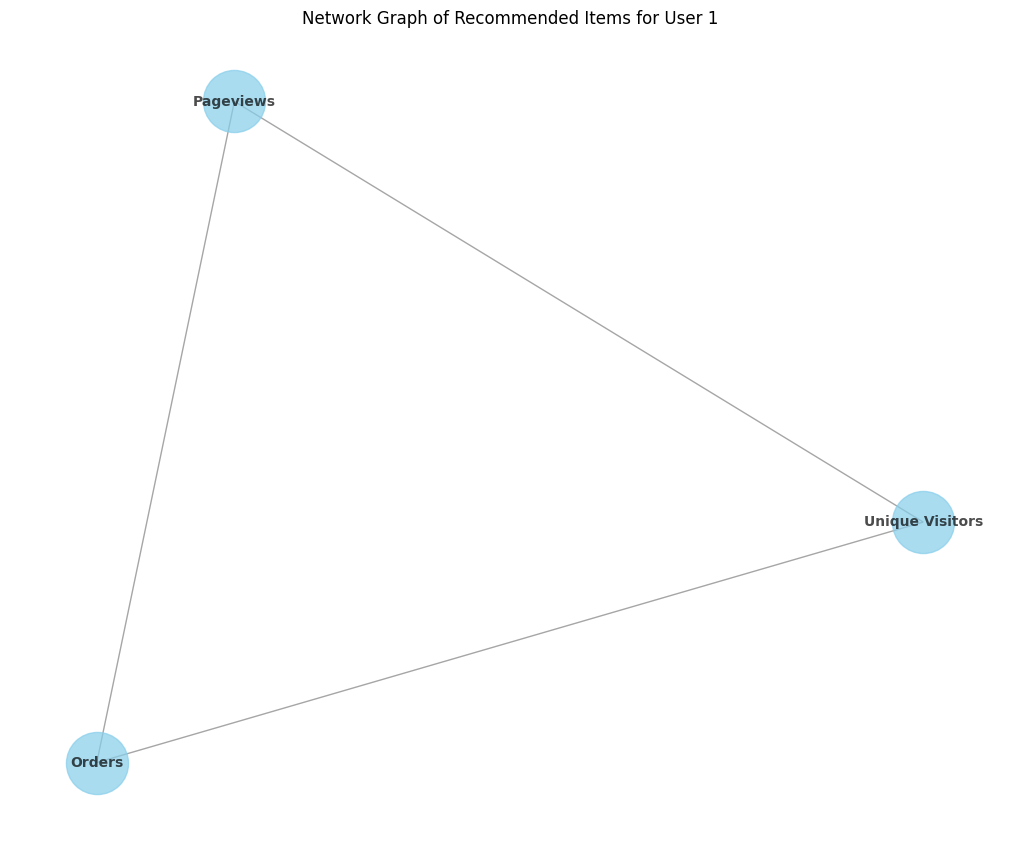

In [ ]:
# Network Graph: Representing items as nodes and their relationships based on co-occurrence in recommendations.

import networkx as nx

# Example usage:
user_id = 1  # Example user ID
recommended_items = user_based_predictions  # Recommended items by the collaborative filtering model

# Convert recommended items to a DataFrame
recommended_items_df = pd.DataFrame.from_dict(recommended_items, orient='index', columns=['Predicted Rating'])

# Convert predicted ratings to binary interactions (1 for recommended items, 0 otherwise)
binary_interactions = recommended_items_df['Predicted Rating'].apply(lambda x: 1 if x > 0 else 0)

# Create an empty graph
G = nx.Graph()

# Add nodes for each recommended item
for item in binary_interactions.index:
    G.add_node(item)

# Add edges between items based on co-occurrence in recommendations
for item1 in binary_interactions.index:
    for item2 in binary_interactions.index:
        if item1 != item2 and binary_interactions[item1] == 1 and binary_interactions[item2] == 1:
            G.add_edge(item1, item2)

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)
plt.title('Network Graph of Recommended Items for User {}'.format(user_id))
plt.tight_layout()
plt.show()



The nodes in the network graph represent items, and the edges represent the strength of the relationship between items based on co-occurrence in recommendations.